In [1]:
#A continuación importamos las librerias que utilizaremos. 
import numpy as np
import os
import matplotlib.pyplot as plt
from IPython.display import display, Latex
from matplotlib import cm
import math
from tqdm import tqdm

100%|██████████| 1000/1000 [00:00<00:00, 250152.32it/s]


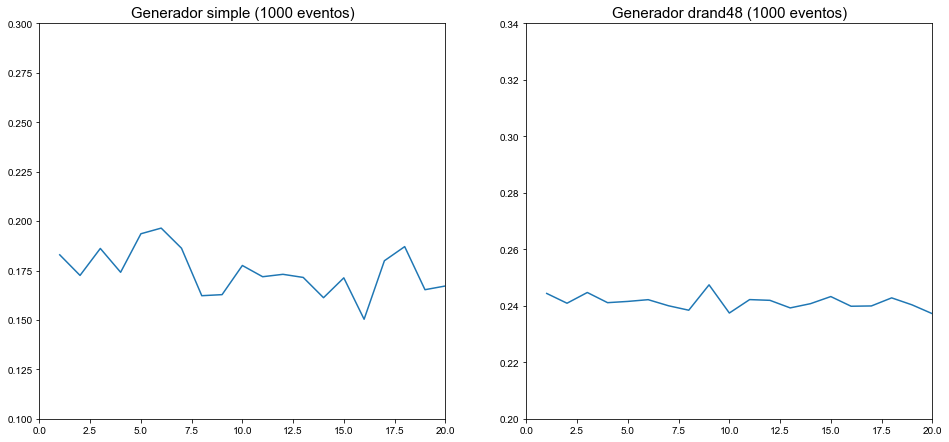

In [2]:
# 2. Programar un mal generador de números aleatorios y usar drand48 en Python para reproducir la Figura.
class MyRandom():
    def __init__(self, seed = 15 , method = 'simple'):
        
        self.r = seed
        self.method = method
        
        if method == 'simple':
            self.a = 57 
            self.c = 1
            self.M = 265
        elif method == "drand48":
            self.a = int('5DEECE66D',16) 
            self.c = int('B', 16)
            self.M = 2 **48
        else:
            print('Generador no reconocido')
    
    def Random(self):
        
        r= (self.a*self.r + self.c)%self.M
        self.r = r
        
        return r/float(self.M)
   
    def Correlation(self, sample_, k_, seed_ = 32 , method_ = 'simple'):
        
        rand = MyRandom(seed = seed_ , method = method_)
        Npoints = len(sample_)            
        Ck = []
        
        for k in range(0,k_):
            sum = 0
            
            for j in range (Npoints-k-1):        
                sum += sample_[j]*sample_[j+k+1]
            sum *= 1/Npoints
        
            Ck.append(sum)               
        
        return Ck
    
def FillPoints(Npoints_ , seed_ ,method_ ):
    
    rand = MyRandom(seed = seed_ , method = method_)
    
    points = np.zeros(Npoints_)
    
    for i in tqdm(range(Npoints_)):
        points[i] = rand.Random()
        
    return points

Npoints= int(1e3)

method1 = 'simple'
method2 = 'drand48'
rand1 =  MyRandom( seed = 6625 , method=method1)
sample1 = FillPoints(Npoints,  6625 , method1)
rand2 =  MyRandom( seed = 6625 , method=method2)
sample2 = FillPoints(Npoints,  6625 , method2)

# Ahora, calculamos los coeficientes de correlación C(k) de ambos métodos para k = 20.

k = 20
Ck1 = rand1.Correlation(sample1,k ,6625, method1)
Ck2 = rand2.Correlation(sample2,k , 6625, method2)

x = np.linspace(1, k , k)

fig = plt.figure(figsize=(16,16))
ax1= fig.add_subplot(2,2,1)
ax2= fig.add_subplot(2,2,2)

ax1.plot(x,Ck1)
ax2.plot(x,Ck2)
ax1.set_xlim(0,k)
ax1.set_ylim(0.1,0.3)
ax1.set_title("Generador simple ("+str(Npoints)+" eventos)", fontsize = "15")
ax2.set_xlim(0,k)
ax2.set_ylim(0.2,0.34)
ax2.set_title("Generador drand48 ("+str(Npoints)+" eventos)", fontsize = "15")

plt.style.use('seaborn-whitegrid')
plt.show()

In [10]:
# 3. La distribuci´on Beta est´a dada por:

def f(x_, alpha_, beta_):
    coef = (math.gamma(alpha_+beta_)/(math.gamma(alpha_)*math.gamma(beta)))
    return coef*((x_)**(alpha_-1))*((1-x_)**(beta_-1))
limits = (np.pi)*(2*np.pi)

def IntegralMC(Npoints_ = int(1e4), alpha_ = 2, beta_ = 4):
    
    X = np.random.rand(Npoints_)
    XTest = np.linspace(0,1,200)
    FXTest = f(XTest, alpha_, beta_)
    Max = max (FXTest)
    
    FY = np.random.rand(Npoints_)*Max
    Ninside = 0   
    for i in range(int(Npoints_)):
    
        yi = FY[i]
    
        if yi < f(X[i], alpha_, beta_):
        
            Ninside +=1 
        
    Eff = Ninside/float(Npoints_)
    return Max*Eff

#Calculamos la integral utilizando ambos métodos.

Npoints = int(1e5)
alpha, beta = 2,4
MCI = IntegralMC(Npoints, alpha, beta)
IntegralReal = 1

display(Latex('Valor estimado de la integral: ' + r'$I_{estimated} =$'+str(MCI) ) )
display(Latex('Valor teórico de la integral: ' + r'$I_{exact} =$'+str(IntegralReal) ) )

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

In [11]:
#4. Véase: https://www.youtube.com/watch?v=I8Hot4q6UYE

In [12]:
#5. Véase: https://www.youtube.com/watch?v=I8Hot4q6UYE

In [17]:
#6. La siguiente integral multidimensional:
def f(x):
    suma = sum(x)
    return suma**2

def IntegralMC1(Npoints_ = int(1e4), d = 8):
    X = []
    for i in range(d):
        X.append(np.random.rand(Npoints_))
        
    F= f(X)
    return np.average(F)/(2**(d-1))

Npoints = 1e5
d = 8
MCI = IntegralMC1(int(Npoints),d)
IntegralReal = 25/192

display(Latex('Valor estimado de la integral: ' + r'$I_{estimated} =$'+str(MCI) ) )
display(Latex('Valor teórico de la integral: ' + r'$I_{exact} =$'+str(IntegralReal) ) )

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

In [39]:
# 7. Sampling of the Likelihood function using the Metropolis Hastings algorithm
# Primero importamos los datos de interés.

file_ = 'Likelihood.dat'
X = np.loadtxt(file_, comments='#')

def Likelihood(x_, mu_, sigma_):
            return 1/np.sqrt(2*np.pi*(sigma_**2))*np.exp(-(x_-mu_)**2/(2*(sigma_**2)))

def Metropolis(m0_,s0_, WidthSteps, NSteps):
    
    mcmc_steps = []
    
    burn_steps = 5000
    
    for i in tqdm(range(NSteps)):
        
        # Present
        P0 = np.product(Likelihood(X, m0_, s0_))
        
        mn_ = m0_ + WidthSteps*2.*(np.random.rand()-0.5)
        sn_ = s0_ + WidthSteps*2.*(np.random.rand()-0.5)
        
        Pn = np.product(Likelihood(X, mn_, sn_))
        
        alpha = Pn/P0
        
        beta = np.random.rand()
        
        if np.minimum(1, alpha > beta):
                
            m0_ = mn_
            s0_ = sn_
                
        if (i >= burn_steps):
            mcmc_steps.append([m0_,s0_]) 
        
        else:
            if (i >= burn_steps):
                mcmc_steps.append([m0_,s0_])  
    
    
    mcmc_steps = np.array(mcmc_steps)
    return mcmc_steps
    
mcmc = Metropolis(1.,0.5,0.3,100000)
print(mcmc)

100%|██████████| 100000/100000 [00:05<00:00, 16888.99it/s]


[[1.6589249  6.01137079]
 [1.54614028 5.86435221]
 [1.81839675 5.69699024]
 ...
 [2.99311823 4.65809723]
 [3.01785939 4.69839899]
 [2.89961408 4.99125213]]


Text(0, 0.5, '$\\mu$')

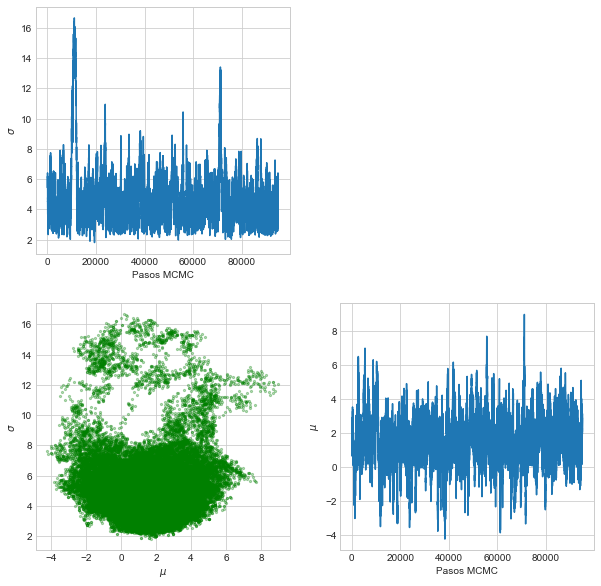

In [40]:
Mu = mcmc[:,0]
Sigma = mcmc[:,1]
fig = plt.figure( figsize=(10,10))

ax1 = fig.add_subplot(2,2,1)
ax3 = fig.add_subplot(2,2,3)
ax4 = fig.add_subplot(2,2,4)

ax1.plot(Sigma)
ax1.set_xlabel("Pasos MCMC")
ax1.set_ylabel(r'$\sigma$')

ax3.scatter(Mu, Sigma, c='g',marker='o', s=5, alpha=0.3)
ax3.set_xlabel(r'$\mu$')
ax3.set_ylabel(r'$\sigma$')

ax4.plot(Mu)
ax4.set_xlabel("Pasos MCMC")
ax4.set_ylabel(r'$\mu$')

Text(0.5, 0, '$\\sigma$')

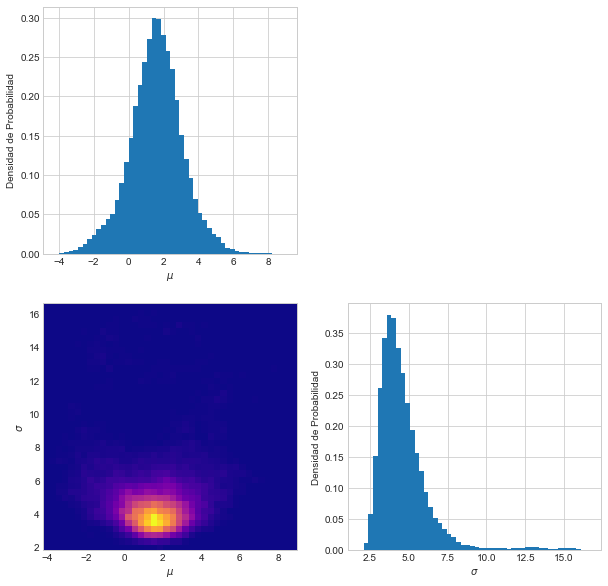

In [41]:
fig = plt.figure( figsize=(10,10))

ax1 = fig.add_subplot(2,2,1)
ax3 = fig.add_subplot(2,2,3)
ax4 = fig.add_subplot(2,2,4)

ax1.hist(Mu, 50, density=True)
ax1.set_ylabel('Densidad de Probabilidad')
ax1.set_xlabel(r'$\mu$')

ax3.hist2d(Mu, Sigma, bins=40,  cmap='plasma')
ax3.set_xlabel(r'$\mu$')
ax3.set_ylabel(r'$\sigma$')

ax4.hist(Sigma, 50, density=True)
ax4.set_ylabel('Densidad de Probabilidad')
ax4.set_xlabel(r'$\sigma$')
#ax4.set_yscale('log')

In [43]:
mean=np.percentile(mcmc[:,0],50)
sigma1 = np.percentile(mcmc[:,0], 16.)
sigma2 = np.percentile(mcmc[:,0], 84.)
display(Latex(r'$\hat{\mu} = '+str(mean)+'_{-' + str(mean-sigma1)+'}'+'^{+'+str(sigma2-mean)+'}$'))
mean=np.percentile(mcmc[:,1],50)
sigma1 = np.percentile(mcmc[:,1], 16.)
sigma2 = np.percentile(mcmc[:,1], 84.)
display(Latex(r'$\hat{\sigma} = '+str(mean)+'_{-' + str(mean-sigma1)+'}'+'^{+'+str(sigma2-mean)+'}$'))

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

In [3]:
#8. En general la varianza de estimadores es no calculable::


def Function(Y, theta_):
    X = []
    for i in Y:
        X.append((1/i)-1)
    Prod = []
    Prod2 =  []
    for i in range(len(X[0])):
        xi = 0
        yi = 1
        for j in range(len(X)):
            xi += X[j][i]
            yi *= 1/(Y[j][i]**2)
        Prod.append(np.exp(-xi/theta_))
        Prod2.append(yi)

    return ((((1/len(Y))*(sum(X)))**2) *Prod*Prod2) , (((1/len(Y))*(sum(X)))*Prod*Prod2)

def IntegralMC1(Npoints_ = int(1e4), n_ = 20 , theta_ = 2):
    Y = []
    for i in range(n_):
        Y.append(np.random.rand(Npoints_))
        
    F1, F2= Function(Y, theta_)
    return (np.average(F1)/(theta_**n)) - (np.average(F2)/(theta_**n))**2

Npoints = 1e6
n, theta = 20, 2
MCI = IntegralMC1(int(Npoints),n, theta)
IntegralReal = 0.2

display(Latex('Valor estimado de la integral: ' + r'$I_{estimated} =$'+str(MCI) ) )
display(Latex('Valor teórico de la integral: ' + r'$I_{exact} =$'+str(IntegralReal) ) )

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

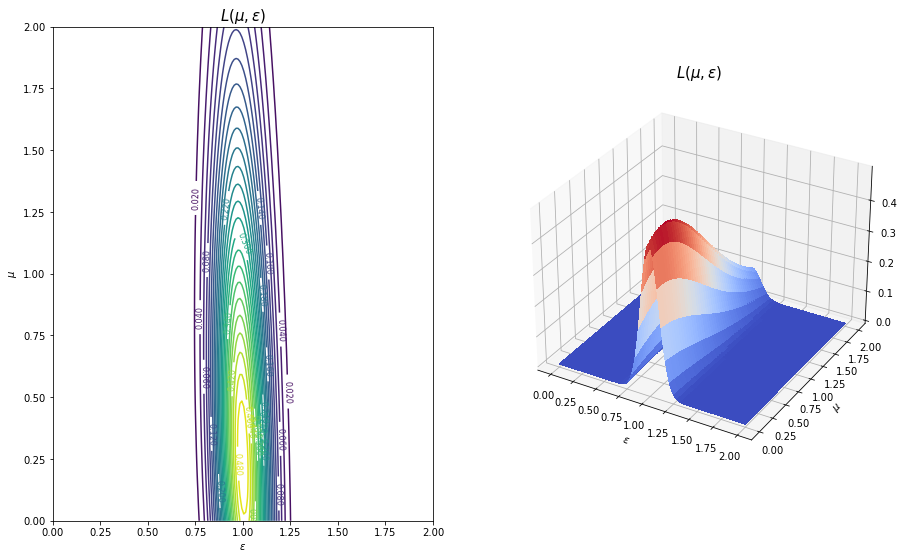

In [12]:
# 9. En física de altas energías el siguiente Toy Model es relevante

def Likelihood(mu_, sigma_, epsilon_, n_, s_, b_):
    
    poisson = (1/math.factorial(n_))*((mu_*s_ + epsilon_*b_)**n)*np.exp(-(mu_*s_ + epsilon_*b_))
    gauss = 1/np.sqrt(2*np.pi*(sigma_**2))*np.exp(-(epsilon_-1)**2/(2*(sigma_**2)))
    
    return poisson*gauss




Likelihood = np.vectorize(Likelihood)
n,b,s, sigma = 10, 9, 4, 0.1
mu_ = np.linspace(0,2,200)
epsilon_ = np.linspace(0.,2.,200)
mu, epsilon = np.meshgrid(mu_,epsilon_)

likelihood = Likelihood (mu, sigma, epsilon, n, s, b)
fig = plt.figure(figsize=(15,20))
ax = fig.add_subplot(221)
c = ax.contour(epsilon, mu,likelihood ,25)
ax.clabel(c, inline=1, fontsize=8)
ax.set_ylabel('$\mu$')
ax.set_xlabel('$\epsilon$')
ax.set_title(r"$L(\mu, \epsilon)$", fontsize = 15)


ax1 = fig.add_subplot(222, projection='3d')
surf = ax1.plot_surface(epsilon, mu, likelihood , cmap=cm.coolwarm ,linewidth=0, antialiased=False)
ax1.set_ylabel('$\mu$')
ax1.set_xlabel('$\epsilon$')
ax1.set_title(r"$L(\mu, \epsilon)$", fontsize = 15 )
plt.show()

In [25]:
def Metropolis(mu0_,epsilon0_,sigma_, n_, s_, b_ ,WidthSteps, NSteps):
    
    mcmc_steps = []
    
    burn_steps = 10000
    
    for i in tqdm(range(NSteps)):
        
        # Present
        P0 = Likelihood(mu0_, sigma_, epsilon0_, n_, s_, b_)
        
        mun_ = mu0_ + WidthSteps*2.*(np.random.rand()-0.5)
        epsilonn_ = epsilon0_ + WidthSteps*2.*(np.random.rand()-0.5)
        
        Pn = Likelihood(mun_, sigma_, epsilonn_, n_, s_, b_)
        
        alpha = Pn/P0
        
        beta = np.random.rand()
        
        if np.minimum(1, alpha > beta):
                
            mu0_ = mun_
            epsilon0_ = epsilonn_
                
        if (i >= burn_steps):
            mcmc_steps.append([mu0_,epsilon0_]) 
        
        else:
            if (i >= burn_steps):
                mcmc_steps.append([mu0_,epsilon0_])  
    
    
    mcmc_steps = np.array(mcmc_steps)
    return mcmc_steps
NSteps = int(1e5)
mcmc = Metropolis(0.5,0.5,sigma, n, s, b, 0.3,NSteps)
print(mcmc)

100%|██████████| 100000/100000 [00:16<00:00, 6022.83it/s]


[[-0.87862391  1.12114174]
 [-0.87862391  1.12114174]
 [-0.87862391  1.12114174]
 ...
 [ 0.90670899  0.95250481]
 [ 1.06302901  0.7959372 ]
 [ 1.06302901  0.7959372 ]]


Text(0, 0.5, '$\\epsilon$')

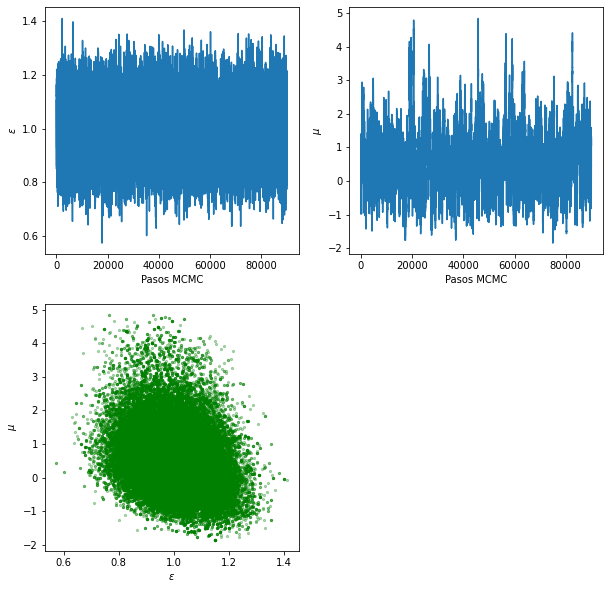

In [26]:
Mu = mcmc[:,0]
Epsilon = mcmc[:,1]
fig = plt.figure( figsize=(10,10))

ax1 = fig.add_subplot(2,2,2)
ax3 = fig.add_subplot(2,2,3)
ax4 = fig.add_subplot(2,2,1)

ax1.plot(Mu)
ax1.set_xlabel("Pasos MCMC")
ax1.set_ylabel(r'$\mu$')

ax3.scatter(Epsilon, Mu, c='g',marker='o', s=5, alpha=0.3)
ax3.set_ylabel(r'$\mu$')
ax3.set_xlabel(r'$\epsilon$')

ax4.plot(Epsilon)
ax4.set_xlabel("Pasos MCMC")
ax4.set_ylabel(r'$\epsilon$')

Text(0.5, 0, '$\\mu$')

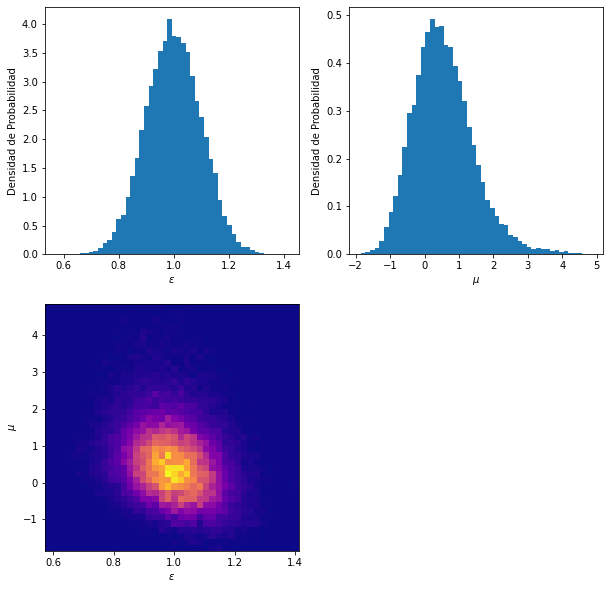

In [27]:
fig = plt.figure( figsize=(10,10))

ax1 = fig.add_subplot(2,2,1)
ax3 = fig.add_subplot(2,2,3)
ax4 = fig.add_subplot(2,2,2)

ax1.hist(Epsilon, 50, density=True)
ax1.set_ylabel('Densidad de Probabilidad')
ax1.set_xlabel(r'$\epsilon$')

ax3.hist2d(Epsilon, Mu, bins=40,  cmap='plasma')
ax3.set_xlabel(r'$\epsilon$')
ax3.set_ylabel(r'$\mu$')

ax4.hist(Mu, 50, density=True)
ax4.set_ylabel('Densidad de Probabilidad')
ax4.set_xlabel(r'$\mu$')
#ax4.set_yscale('log')

In [28]:
mean=np.percentile(mcmc[:,0],50)
sigma1 = np.percentile(mcmc[:,0], 16.)
sigma2 = np.percentile(mcmc[:,0], 84.)
display(Latex(r'$\hat{\mu} = '+str(mean)+'_{-' + str(mean-sigma1)+'}'+'^{+'+str(sigma2-mean)+'}$'))
mean=np.percentile(mcmc[:,1],50)
sigma1 = np.percentile(mcmc[:,1], 16.)
sigma2 = np.percentile(mcmc[:,1], 84.)
display(Latex(r'$\hat{\epsilon} = '+str(mean)+'_{-' + str(mean-sigma1)+'}'+'^{+'+str(sigma2-mean)+'}$'))

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>